# Introducing Pandas

Pandas is a Python library that makes handling tabular data easier. Since we're analysing data in python - this is something we'll use from time to time!


Introduces "Data Frames" and "Series" that allow you to slice and dice rows and columns of information. 

But what are "Data Frames" and "Series"? 

Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). It is basically a table where data is arranged in rows and columns.

A pandas Series is a one-dimensional labelled data structure which can hold data such as strings, integers and even other Python objects. It is built on top of numpy array and is the primary data structure to hold one-dimensional data in pandas.

We will be using the file SN_y_tot_V2.0.csv which contains sunspot data to introduce pandas



In [1]:
%matplotlib inline
import pandas as pd
#have used a document SN_y_tot_V2.0.csv, can also use any other csv file/tabular file with data

sunspots = pd.read_csv("SN_y_tot_V2.0.csv", header = None, sep = ';')

print(type(sunspots))
sunspots.head()

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4
0,1700.5,8.3,-1.0,-1,1
1,1701.5,18.3,-1.0,-1,1
2,1702.5,26.7,-1.0,-1,1
3,1703.5,38.3,-1.0,-1,1
4,1704.5,60.0,-1.0,-1,1


head() is a handy way to visualize what you've loaded. You can pass it an integer to see some specific number of rows at the beginning of your DataFrame:

In [2]:
sunspots.head(2)

,0,1,2,3,4
0,1700.5,8.3,-1.0,-1,1
1,1701.5,18.3,-1.0,-1,1


You can also view the end of your data with tail():

In [3]:
sunspots.tail(4)

,0,1,2,3,4
318,2018.5,7.0,1.1,12611,1
319,2019.5,3.6,0.5,12884,1
320,2020.5,8.8,4.1,14440,1
321,2021.5,29.7,7.7,14721,0


We often talk about the "shape" of your DataFrame. This is just its dimensions. This particular CSV file has 322 rows with 5 columns per row:

In [4]:
sunspots.shape

(322, 5)

The total size of the data frame is the rows * columns:

In [5]:
sunspots.size

1610

The len() function gives you the number of rows in a DataFrame:

In [6]:
len(sunspots)

322

Apart from reading from a file, we can also make pandas dataframe directly as follows:

In [7]:
data = {
  "name": ["Sally", "Mary", "John"],
  "age": [50, 40, 30]
}

df = pd.DataFrame(data)
df

,name,age
0,Sally,50
1,Mary,40
2,John,30


DataFrames generally have named columns (in our case, these are absent in the .csv file, so we must assign these ourselves)

In [8]:

print(sunspots.columns) #initially just have values 0,1,2 like indexes
sunspots.columns = sunspots.columns = ['year', 'n_spots', 'std', 'n_obs', 'valid']
print(sunspots.columns)

Int64Index([0, 1, 2, 3, 4], dtype='int64')
Index(['year', 'n_spots', 'std', 'n_obs', 'valid'], dtype='object')


You can traverse the df.columns object just like a list

In [9]:
sunspots.head()

,year,n_spots,std,n_obs,valid
0,1700.5,8.3,-1.0,-1,1
1,1701.5,18.3,-1.0,-1,1
2,1702.5,26.7,-1.0,-1,1
3,1703.5,38.3,-1.0,-1,1
4,1704.5,60.0,-1.0,-1,1


In [10]:
sunspots.columns[1]

'n_spots'

## Extracting specific columns

Extracting a single column from your DataFrame looks like this - this gives you back a "Series" in Pandas:

In [11]:
print(type(sunspots['n_spots']))
print(sunspots['n_spots'])

<class 'pandas.core.series.Series'>
0       8.3
1      18.3
2      26.7
3      38.3
4      60.0
       ... 
317    21.7
318     7.0
319     3.6
320     8.8
321    29.7
Name: n_spots, Length: 322, dtype: float64


You can also extract a given range of rows from a named column, like so:

In [12]:
sunspots['n_spots'][1:5]

1    18.3
2    26.7
3    38.3
4    60.0
Name: n_spots, dtype: float64

Or even extract a single value from a specified column / row combination:

In [13]:
sunspots['n_spots'][5]

96.7

Instead of a series, you could get a dataframe type object as well by making the column name passed into an array

In [14]:
print(type(sunspots[['n_spots']]))
print(sunspots[['n_spots']])

<class 'pandas.core.frame.DataFrame'>
     n_spots
0        8.3
1       18.3
2       26.7
3       38.3
4       60.0
..       ...
317     21.7
318      7.0
319      3.6
320      8.8
321     29.7

[322 rows x 1 columns]


To extract more than one column, you pass in an array of column names instead of a single one:

In [15]:
sunspots[['year', 'n_spots']]

,year,n_spots
0,1700.5,8.3
1,1701.5,18.3
2,1702.5,26.7
3,1703.5,38.3
4,1704.5,60.0
...,...,...
317,2017.5,21.7
318,2018.5,7.0
319,2019.5,3.6
320,2020.5,8.8


You can also extract specific ranges of rows from more than one column, in the way you'd expect:

In [16]:
sunspots[['year', 'n_spots']][:5]

,year,n_spots
0,1700.5,8.3
1,1701.5,18.3
2,1702.5,26.7
3,1703.5,38.3
4,1704.5,60.0


## Sorting 

Sorting your DataFrame by a specific column looks like this:

In [17]:
sunspots.sort_values('n_obs')

,year,n_spots,std,n_obs,valid
0,1700.5,8.3,-1.0,-1,1
87,1787.5,220.0,-1.0,-1,1
86,1786.5,138.2,-1.0,-1,1
85,1785.5,40.2,-1.0,-1,1
84,1784.5,17.0,-1.0,-1,1
...,...,...,...,...,...
317,2017.5,21.7,2.5,11444,1
318,2018.5,7.0,1.1,12611,1
319,2019.5,3.6,0.5,12884,1
320,2020.5,8.8,4.1,14440,1


## Data Analysis

To gain superficial analytics of a dataframe, .describe() is a useful function. It gives a statistical description of the data in the dataframe. This includes the mean, median, standard deviation, range of values etc. It is a useful feature when viewing and starting the analysis of a new dataframe.

In [19]:
sunspots.describe()

,year,n_spots,std,n_obs,valid
count,322.000000,322.000000,322.000000,322.000000,322.000000
mean,1861.000000,78.365528,4.632919,1111.956522,0.996894
std,93.097619,62.054393,5.274234,2566.129547,0.055728
min,1700.500000,0.000000,-1.000000,-1.000000,0.000000
25%,1780.750000,24.325000,-1.000000,-1.000000,1.000000
50%,1861.000000,65.150000,4.150000,365.000000,1.000000
75%,1941.250000,115.075000,8.850000,365.000000,1.000000
max,2021.500000,269.300000,19.100000,14721.000000,1.000000


We have seen how to view only specific columns of a dataframe, but when we analyse data, we often want to view only certain rows of the dataframe. This can be done by querying the dataframe. Querying means to filter columns based on a condition or a set of conditions. .query() function takes a condition in the form of a string as a parameter.

In [20]:
print(sunspots.query('n_obs > 0').sort_values(['n_obs']))

       year  n_spots   std  n_obs  valid
137  1837.5    227.3  19.1    150      1
136  1836.5    192.7  17.6    166      1
135  1835.5     85.8  11.8    173      1
139  1839.5    143.0  15.1    194      1
124  1824.5     11.4   4.6    194      1
..      ...      ...   ...    ...    ...
317  2017.5     21.7   2.5  11444      1
318  2018.5      7.0   1.1  12611      1
319  2019.5      3.6   0.5  12884      1
320  2020.5      8.8   4.1  14440      1
321  2021.5     29.7   7.7  14721      0

[204 rows x 5 columns]


In [21]:
print(sunspots.query('n_spots > 100'))

       year  n_spots   std  n_obs  valid
17   1717.5    105.0  -1.0     -1      1
26   1726.5    130.0  -1.0     -1      1
27   1727.5    203.3  -1.0     -1      1
28   1728.5    171.7  -1.0     -1      1
29   1729.5    121.7  -1.0     -1      1
..      ...      ...   ...    ...    ...
299  1999.5    136.3   9.3   6413      1
300  2000.5    173.9  10.1   5953      1
301  2001.5    170.4  10.5   6558      1
302  2002.5    163.6   9.8   6588      1
314  2014.5    113.3   8.0   5273      1

[105 rows x 5 columns]


Do you notice anything about the indexes in the data printed above? We will come back to that in a bit. 

Querying is useful if for example you only want to analyse the statistics for days when the sun is shows more than 100 sunspots.

In [22]:
sunspots.query('n_spots > 100').describe()

,year,n_spots,std,n_obs,valid
count,105.000000,105.000000,105.000000,105.000000,105.0
mean,1871.233333,153.450476,7.900952,893.066667,1.0
std,86.564368,41.662820,6.252669,1928.283011,0.0
min,1717.500000,102.000000,-1.000000,-1.000000,1.0
25%,1787.500000,116.700000,-1.000000,-1.000000,1.0
50%,1870.500000,143.000000,9.500000,365.000000,1.0
75%,1948.500000,182.600000,12.400000,365.000000,1.0
max,2014.500000,269.300000,19.100000,7845.000000,1.0


Other than dataframes, even series objects can be operated on to filter out values.

In [23]:
spots_series = sunspots['n_spots']
print(spots_series)

0       8.3
1      18.3
2      26.7
3      38.3
4      60.0
       ... 
317    21.7
318     7.0
319     3.6
320     8.8
321    29.7
Name: n_spots, Length: 322, dtype: float64


filtering in series is similar to how it works in numpy arrays

In [24]:
print(spots_series[spots_series>100]) #only gives specific rows

17     105.0
26     130.0
27     203.3
28     171.7
29     121.7
       ...  
299    136.3
300    173.9
301    170.4
302    163.6
314    113.3
Name: n_spots, Length: 105, dtype: float64


In [25]:
print(spots_series.where(spots_series>100)[16:28]) #gives all the rows but sets NaN values where the condition is folse

16      NaN
17    105.0
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26    130.0
27    203.3
Name: n_spots, dtype: float64


Now, coming back to the indexes we see that when we filter a series object or query a dataframe, the indexes are mantained and do not start from 0 again in the new dataframe. This is convinient sometimes as it works as an ID for the row, but it often causes trouble when we try to run loops over the table etc. It is therefore, possible to reset the index a dataframe to allow it to go from 0 to number of rows again. 

In [26]:
print(sunspots.query('n_spots > 100').reset_index())

     index    year  n_spots   std  n_obs  valid
0       17  1717.5    105.0  -1.0     -1      1
1       26  1726.5    130.0  -1.0     -1      1
2       27  1727.5    203.3  -1.0     -1      1
3       28  1728.5    171.7  -1.0     -1      1
4       29  1729.5    121.7  -1.0     -1      1
..     ...     ...      ...   ...    ...    ...
100    299  1999.5    136.3   9.3   6413      1
101    300  2000.5    173.9  10.1   5953      1
102    301  2001.5    170.4  10.5   6558      1
103    302  2002.5    163.6   9.8   6588      1
104    314  2014.5    113.3   8.0   5273      1

[105 rows x 6 columns]


## Data cleaning(removing outliers and NaN values)

While doing data analysis, it is often important to remove missing values i.e NaN or None values from a pandas dataframe. A few techniques based on required specifications have been demonstrated:

In [27]:
import numpy as np
technologies = ({
     'Courses':["Spark",'Java',"Hadoop",'Python',np.nan],
     'Fee' :[20000,np.nan,26000,24000,np.nan],
     'Duration':['30days',np.nan,'35days','40days',np.nan],
     'Discount':[1000,np.nan,2500,None,np.nan]
               })
df = pd.DataFrame(technologies)
df

,Courses,Fee,Duration,Discount
0,Spark,20000.0,30days,1000.0
1,Java,NaN,NaN,NaN
2,Hadoop,26000.0,35days,2500.0
3,Python,24000.0,40days,NaN
4,NaN,NaN,NaN,NaN


To see where the null values are, we can use the isnull() function and we can call sum on that dataframe to 
find the number of null values in each column

In [28]:
print(df.isnull())
print(df.isnull().sum())

   Courses    Fee  Duration  Discount
0    False  False     False     False
1    False   True      True      True
2    False  False     False     False
3    False  False     False      True
4     True   True      True      True
Courses     1
Fee         2
Duration    2
Discount    3
dtype: int64


In [29]:
# Drop all rows with atleast 1 NaN value
df2=df.dropna()
df2

,Courses,Fee,Duration,Discount
0,Spark,20000.0,30days,1000.0
2,Hadoop,26000.0,35days,2500.0


Indexes can be reset even here

In [30]:
df2=df.dropna().reset_index()
df2

,index,Courses,Fee,Duration,Discount
0,0,Spark,20000.0,30days,1000.0
1,2,Hadoop,26000.0,35days,2500.0


To drop only that row that has all NaN values:

In [31]:
df2=df.dropna(how= 'all')
df2

,Courses,Fee,Duration,Discount
0,Spark,20000.0,30days,1000.0
1,Java,NaN,NaN,NaN
2,Hadoop,26000.0,35days,2500.0
3,Python,24000.0,40days,NaN


In [32]:
# Drop rows that has NaN values on selected columns
df2=df.dropna(subset=['Courses','Fee'])
df2

,Courses,Fee,Duration,Discount
0,Spark,20000.0,30days,1000.0
2,Hadoop,26000.0,35days,2500.0
3,Python,24000.0,40days,NaN


We can even drop these rows directly from the original dataframe using inplace = True

In [33]:
print(df.dropna(inplace=True))
df

None


,Courses,Fee,Duration,Discount
0,Spark,20000.0,30days,1000.0
2,Hadoop,26000.0,35days,2500.0


Sometimes you have to remove outliers from your data and quantile is a feature that allows you to more easily do that. Going back to the sunspots file, if we want to remove data for days with a lot of or an extremely few number of sunspots, this is how we do it

In [34]:
sunspots.sort_values("n_spots")

,year,n_spots,std,n_obs,valid
11,1711.5,0.0,-1.0,-1,1
110,1810.5,0.0,-1.0,-1,1
12,1712.5,0.0,-1.0,-1,1
123,1823.5,2.2,2.7,302,1
111,1811.5,2.3,-1.0,-1,1
...,...,...,...,...,...
137,1837.5,227.3,19.1,150,1
170,1870.5,232.0,17.1,365,1
78,1778.5,257.3,-1.0,-1,1
258,1958.5,261.7,10.8,365,1


In [35]:
q_hi = sunspots["n_spots"].quantile(0.99)
q_lo = sunspots["n_spots"].quantile(0.01)
filtered = sunspots[(sunspots["n_spots"] < q_hi) & (sunspots["n_spots"] > q_lo)]
filtered.sort_values("n_spots")

,year,n_spots,std,n_obs,valid
111,1811.5,2.3,-1.0,-1,1
213,1913.5,2.4,2.3,365,1
13,1713.5,3.3,-1.0,-1,1
319,2019.5,3.6,0.5,12884,1
109,1809.5,4.2,-1.0,-1,1
...,...,...,...,...,...
280,1980.5,218.9,9.9,366,1
87,1787.5,220.0,-1.0,-1,1
279,1979.5,220.1,9.9,365,1
259,1959.5,225.1,10.0,365,1


As you can see, rows with very few and very large number of sunspots are gone

## Counting

You can break down the number of unique values in a given column into a Series using value_counts() - this is a good way to understand the distribution of your data:

In [36]:
degree_counts = sunspots.query('n_obs<367')['n_obs'].value_counts()
degree_counts[:4]

-1      118
 365    100
 366     32
 277      2
Name: n_obs, dtype: int64

As is evident, there are a lot of days with -1 observations and a lot with 365 or 366 observations. This might mean that there is some factor in the observation mechanism which causes these numbers to frequently appear here.

Pandas even makes it easy to plot a Series or DataFrame directly, without involving any other plotting library - just call plot():

<AxesSubplot:>

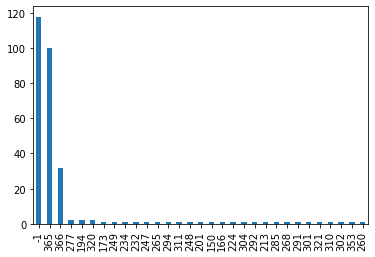

In [37]:
degree_counts.plot(kind='bar')

### Groupping of data

The Pandas 'groupby' function lets you split data into groups based on some criteria. Pandas DataFrames can be split on either axis, ie., row or column.

We’ll start with a multi-level grouping example, which uses more than one argument for the groupby function and returns an iterable groupby-object that we can work on:

In [38]:
data = {
  "Name": ["Sally", "Mary", "John","Geronimo","Alex","Robert","Tessa"],
  "Age": [50, 40, 30,18,15,25,19],
  "Gender":["F","F","M","M","M","M","F"]
  }

people = pd.DataFrame(data)
people

,Name,Age,Gender
0,Sally,50,F
1,Mary,40,F
2,John,30,M
3,Geronimo,18,M
4,Alex,15,M
5,Robert,25,M
6,Tessa,19,F


In [39]:
people.groupby(["Gender","Name"]).first()

Age
Gender Name         
F      Mary       40
       Sally      50
       Tessa      19
M      Alex       15
       Geronimo   18
       John       30
       Robert     25

As can be seen from above we grouped by gender and then by person's name. 

Now let’s look at the inner structure of a groupby object. We can iterate over the object created by the following:

In [40]:
grouped_obj = people.groupby(["Gender"])
for gender, item in grouped_obj:
    print("gender is: " + str(gender))
    print(str(item), "\n\n")

gender is: F
    Name  Age Gender
0  Sally   50      F
1   Mary   40      F
6  Tessa   19      F 


gender is: M
       Name  Age Gender
2      John   30      M
3  Geronimo   18      M
4      Alex   15      M
5    Robert   25      M 




We can also use the function mean on the Age column to calculate the average Age for each Gender.

In [41]:
people.groupby(["Gender"])["Age"].mean()

Gender
F    36.333333
M    22.000000
Name: Age, dtype: float64

We can even count the number of entities in a particular group

In [42]:
people.groupby("Gender")["Gender"].count()

Gender
F    3
M    4
Name: Gender, dtype: int64

## Plotting of data

### Seaborn

Seaborn is a library built on top of matplotlib. It is used for data visualization and exploratory data analysis. Seaborn works easily with dataframes and the Pandas library. The graphs created can also be customized easily.

#### importing Seaborn

In [43]:
import seaborn as sns

The data that we'll use is the same csv file we imported earlier.

In [44]:
sunspots.head()

,year,n_spots,std,n_obs,valid
0,1700.5,8.3,-1.0,-1,1
1,1701.5,18.3,-1.0,-1,1
2,1702.5,26.7,-1.0,-1,1
3,1703.5,38.3,-1.0,-1,1
4,1704.5,60.0,-1.0,-1,1


#### Line plot

<AxesSubplot:xlabel='year', ylabel='n_spots'>

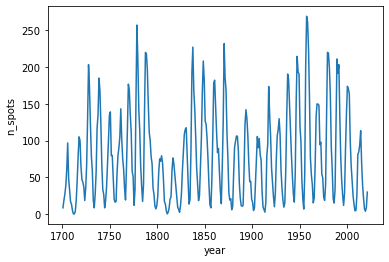

In [45]:
sns.lineplot(data=sunspots, x='year', y='n_spots')

#### Displot

To plot histograms of a particular entity

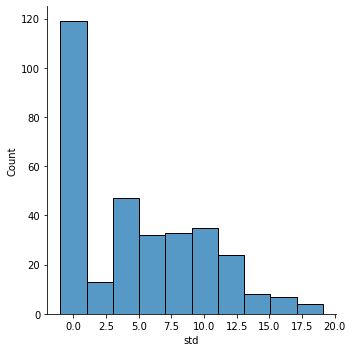

In [46]:
sns.displot(data=sunspots, x='std')

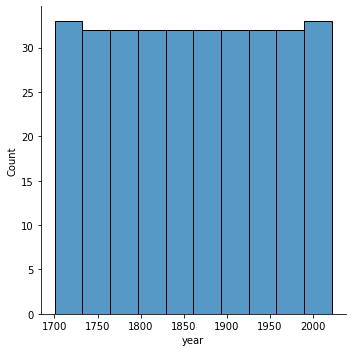

In [47]:
sns.displot(data=sunspots, x='year')

We can add some other modifications to our plot too.

Lets look at a few examples:

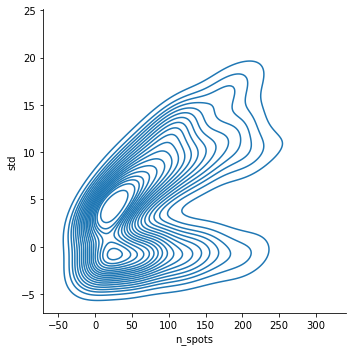

In [48]:
sns.displot(data=sunspots, x='n_spots', y='std', kind="kde", levels=20)

The above is a contour plot of n_spots vs std.

#### Distplot

Distplot is used to plot histogram of a particular entity along with a line graph.

To use this feature, we first need to create a numpy array of the entity we want to plot.

Let us take 'n_spots' from the sunspots data.

In [49]:
n_spots = sunspots['n_spots'].to_numpy()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

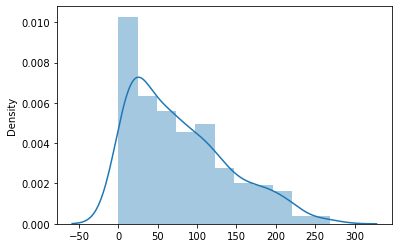

In [50]:
sns.distplot(n_spots)

#### Jointplot

It is the combination of the displot of two variables. We additionally obtain a scatter plot between the variable to reflecting their linear relationship. We can customize the scatter plot into a hexagonal plot, where, more the color intensity, the more will be the number of observations.

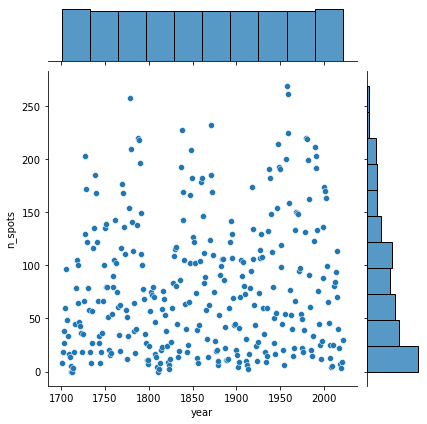

In [51]:
sns.jointplot(data=sunspots, x='year', y='n_spots', kind='scatter')

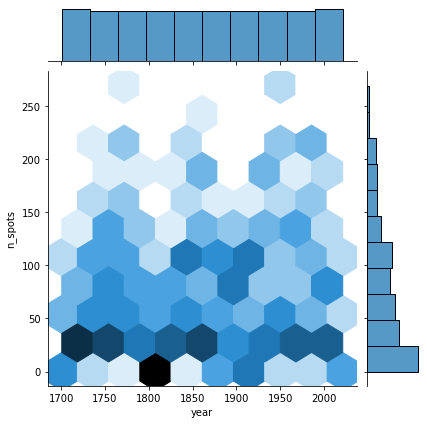

In [52]:
sns.jointplot(data=sunspots, x='year', y='n_spots', kind='hex')

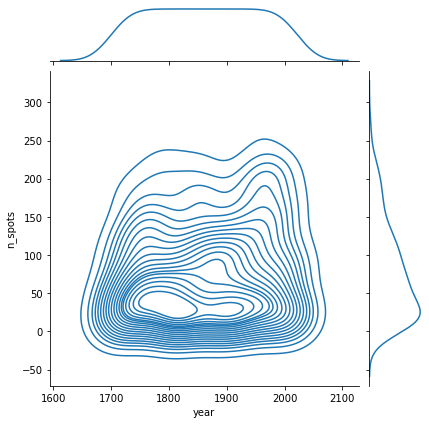

In [53]:
sns.jointplot(data=sunspots, x='year', y='n_spots', kind='kde', levels=20)